## Importing some basic libraries

In [7]:
import warnings # For ignoring warnings
warnings.filterwarnings("ignore")

import numpy as np # Linear algebra
import pandas as pd # Data processing, csv i/p o/p
import matplotlib.pyplot as plt # Data visualization
%matplotlib inline
import seaborn as sns # Data visualization

## Loading datasets

In [5]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [9]:
print("Training Dataset shape : ", df_train.shape)
df_train.sample(5)

Training Dataset shape :  (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
101,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S
478,479,0,3,"Karlsson, Mr. Nils August",male,22.0,0,0,350060,7.5208,NaN,S
645,646,1,1,"Harper, Mr. Henry Sleeper",male,48.0,1,0,PC 17572,76.7292,D33,C
192,193,1,3,"Andersen-Jensen, Miss. Carla Christine Nielsine",female,19.0,1,0,350046,7.8542,NaN,S
409,410,0,3,"Lefebre, Miss. Ida",female,NaN,3,1,4133,25.4667,NaN,S


In [10]:
print("Testing Dataset shape : ", df_test.shape)
df_test.sample(5)

Testing Dataset shape :  (418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
321,1213,3,"Krekorian, Mr. Neshan",male,25.0,0,0,2654,7.2292,F E57,C
255,1147,3,"MacKay, Mr. George William",male,NaN,0,0,C.A. 42795,7.5500,NaN,S
104,996,3,"Thomas, Mrs. Alexander (Thamine Thelma"")""",female,16.0,1,1,2625,8.5167,NaN,C
215,1107,1,"Head, Mr. Christopher",male,42.0,0,0,113038,42.5000,B11,S
147,1039,3,"Davies, Mr. Evan",male,22.0,0,0,SC/A4 23568,8.0500,NaN,S


## Analyzing Training Data

In [22]:
df_train.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [23]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [24]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


### Catagorical Features
#### Samples are classified into similar sets
#### Within catagorical we have Nominal, Ordinal, Ratio, Interval based 
- Survived
- Sex
- Embarked
- Pclass (Ordinal)

### Numerical Features
#### Values change from sample to sample
#### Within Numerical we have Discrete, Continuous, timeseries
- Age
- Fare
- Sibsp (Discrete)
- Parch (Discrete)

In [28]:
print('Number of Null/ Na/ Nan values in features of Train data : \n', df_train.isna().sum())
print('')
print('Number of Null/ Na/ Nan values in features of Test data : \n', df_test.isna().sum())

Number of Null/ Na/ Nan values in features of Train data : 
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Number of Null/ Na/ Nan values in features of Test data : 
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


### Features containing Null or empty values
#### Training Data
Cabin > Age > Embarked

#### Testing Data
Cabin > Age

### Data typese of various features 
- Seven features are int or float, Six in case of test data.
- Five features are string(object).

In [29]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [32]:
# include the object data types
df_train.describe(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Abbott, Mr. Rossmore Edward",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


### About Features
- Total train samples are 891.
- Survived (Dependent Variable) is a catagorical feature of 0 or 1 values.
- About 38% survived according to the table.
- Mean age of passengers is 29.
- There were about 577 male out of 891 passengers 65%
- In Embarked there were 3 possibilities and S was used by most of them (644 out of 889)
- Unique tickets were 681 about 22% were duplicates

In [35]:
df_train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


## Visualizing data

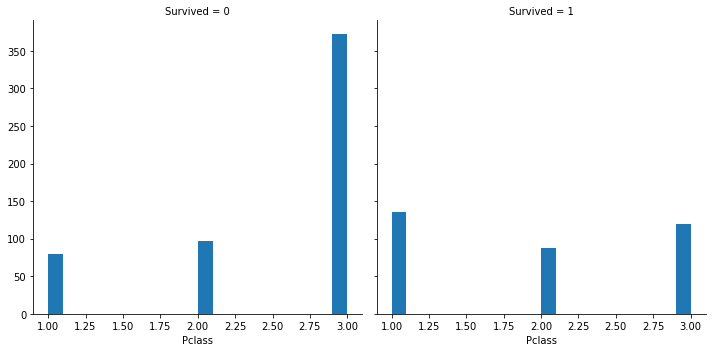

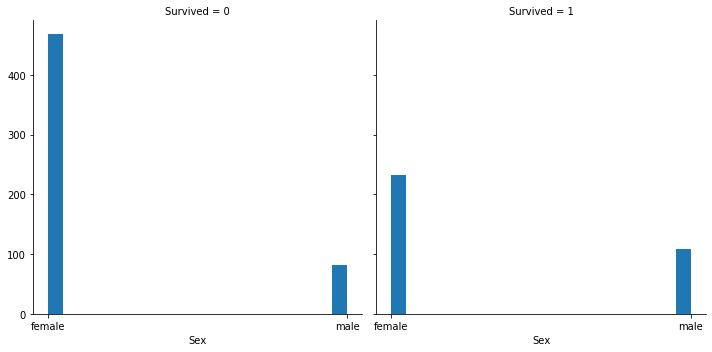

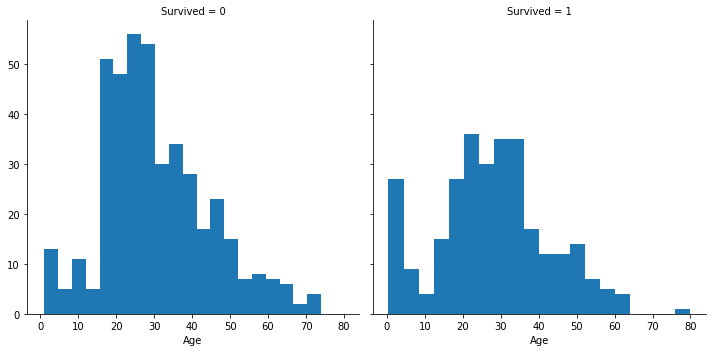

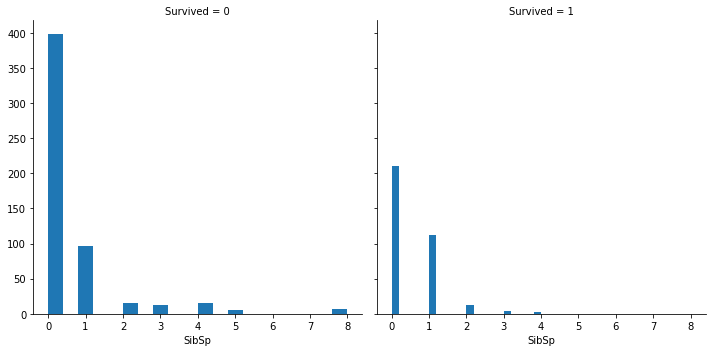

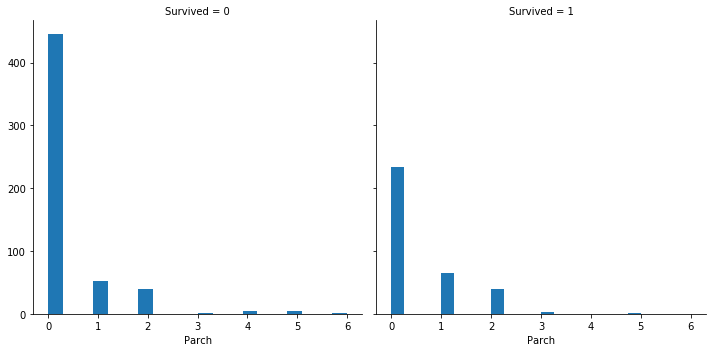

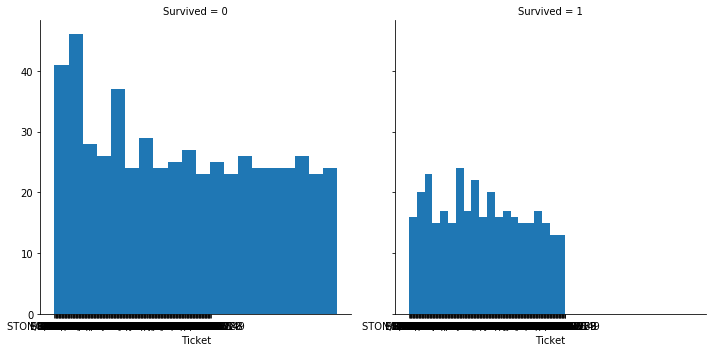

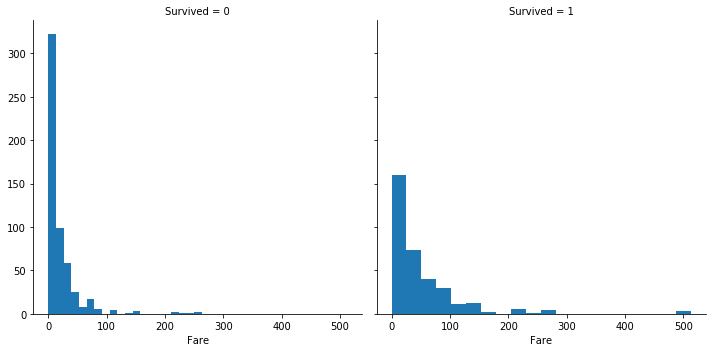

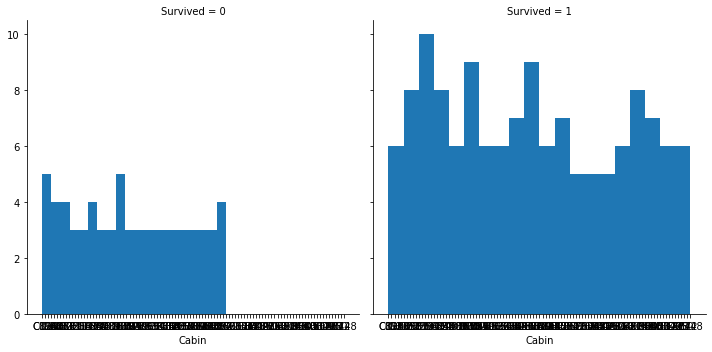

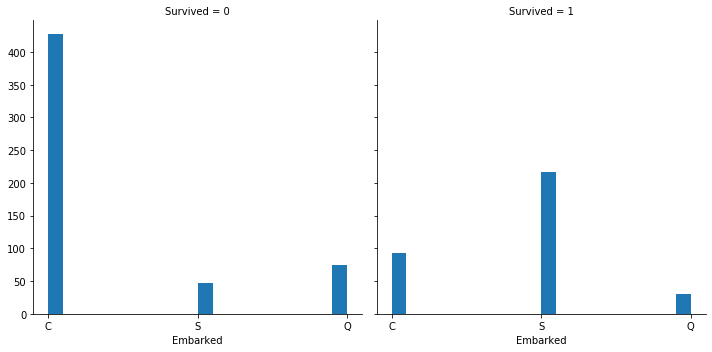

In [59]:
for i in ['Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']:
    g =sns.FacetGrid(df_train, col='Survived', size=5, aspect=1)
    g.map(plt.hist, i, bins=20)